<a href="https://www.kaggle.com/code/davidjohnmillard/eda-2d-3d-visualization?scriptVersionId=121604779" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports/Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib widget  # comment out for notebook visualization
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import plotly.express as px

In [2]:
path_train = '/kaggle/input/asl-signs/train.csv'

In [3]:
dftr = pd.read_csv(path_train)

We select the first associated landmark files to get a feel for how the data is.

# Basic EDA

In [4]:
dftr

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie
...,...,...,...,...
94472,train_landmark_files/53618/999786174.parquet,53618,999786174,white
94473,train_landmark_files/26734/999799849.parquet,26734,999799849,have
94474,train_landmark_files/25571/999833418.parquet,25571,999833418,flower
94475,train_landmark_files/29302/999895257.parquet,29302,999895257,room


In [5]:
example_landmark = pd.read_parquet('/kaggle/input/asl-signs/train_landmark_files/26734/1000035562.parquet')

In [6]:
example_landmark

,frame,row_id,type,landmark_index,x,y,z
0,20,20-face-0,face,0,0.494400,0.380470,-0.030626
1,20,20-face-1,face,1,0.496017,0.350735,-0.057565
2,20,20-face-2,face,2,0.500818,0.359343,-0.030283
3,20,20-face-3,face,3,0.489788,0.321780,-0.040622
4,20,20-face-4,face,4,0.495304,0.341821,-0.061152
...,...,...,...,...,...,...,...
12484,42,42-right_hand-16,right_hand,16,0.001660,0.549574,-0.145409
12485,42,42-right_hand-17,right_hand,17,0.042694,0.693116,-0.085307
12486,42,42-right_hand-18,right_hand,18,0.006723,0.665044,-0.114017
12487,42,42-right_hand-19,right_hand,19,-0.014755,0.643799,-0.123488


In [7]:
example_landmark['frame'].min()

20

In [8]:
example_landmark['frame'].max()

42

In [9]:
example_landmark['frame'].max() - example_landmark['frame'].min()

22

This will give us a count of what information each frame has. 

In [10]:
minn = example_landmark['frame'].min()
maxx = example_landmark['frame'].max()

for i in range(minn, maxx+1):
    print('Frame: ' + str(i))
    t = example_landmark[example_landmark['frame'] == i]
    print('   Face: ' + str(t[t['type'] == 'face']['x'].isnull().sum()))
    print('   Pose: ' + str(t[t['type'] == 'pose']['x'].isnull().sum()))
    print('   RH: ' + str(t[t['type'] == 'right_hand']['x'].isnull().sum()))
    print('   LH: ' + str(t[t['type'] == 'left_hand']['x'].isnull().sum()))

Frame: 20
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 21
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 22
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 23
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 24
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 25
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 26
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 27
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 28
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 29
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 30
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 31
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 32
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 33
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 34
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 35
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 36
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 37
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 38
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 39
   Face: 0
 

It looks like the left hand has no information.
The data later on should reveal that the pose will have the left hand out of screen.
It also looks like the right hand goes out of frame a bit.

# Single Frame - Single Instace 2D/3D Visualization

In [11]:
sgl_in = example_landmark[example_landmark['frame'] == 21]

In [12]:
sgl_in['type'].value_counts()

face          468
pose           33
left_hand      21
right_hand     21
Name: type, dtype: int64

In [13]:
sgl_in_rh = sgl_in[sgl_in['type'] == 'right_hand']

### Right Hand Instance

In [14]:
sgl_in_rh

,frame,row_id,type,landmark_index,x,y,z
1065,21,21-right_hand-0,right_hand,0,0.324517,0.548338,-1.557659e-07
1066,21,21-right_hand-1,right_hand,1,0.387831,0.498510,1.798490e-02
1067,21,21-right_hand-2,right_hand,2,0.415546,0.453401,2.024590e-02
1068,21,21-right_hand-3,right_hand,3,0.439700,0.417401,9.602044e-03
1069,21,21-right_hand-4,right_hand,4,0.460026,0.386194,-1.909269e-03
1070,21,21-right_hand-5,right_hand,5,0.373587,0.413692,4.272605e-02
1071,21,21-right_hand-6,right_hand,6,0.397488,0.367304,2.332437e-02
1072,21,21-right_hand-7,right_hand,7,0.434238,0.372896,1.499567e-03
1073,21,21-right_hand-8,right_hand,8,0.460619,0.383279,-1.299786e-02
1074,21,21-right_hand-9,right_hand,9,0.350432,0.415225,1.587926e-02


In [15]:
def add_init_c(start, end, hand):
    return (
        pd.concat([hand['x'][start:start+1], hand['x'][end[0]:end[1]]]), 
        pd.concat([hand['y'][start:start+1], hand['y'][end[0]:end[1]]]), 
        pd.concat([hand['z'][start:start+1], hand['z'][end[0]:end[1]]])
        )

In [16]:
def plot_hand(hand, td):
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)

    if td:
        ax = Axes3D(fig, auto_add_to_figure=False)
        fig.add_axes(ax)

    ind = [[0, [0, 5]], [0, [5, 9]], [0, [17, 21]], [5, [9, 13]], [17, [13, 17]], [9, [13, 14]]]

    for i, k in ind: 
        x, y, z = add_init_c(i, k, hand)
        if td:
            ax.plot(x, -1*y, z)
        else:
            ax.plot(x, -1*y)

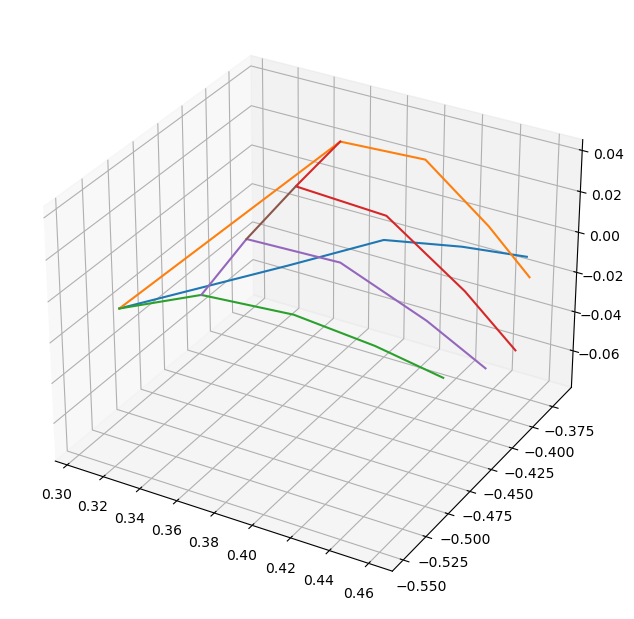

In [17]:
plot_hand(sgl_in_rh, True)

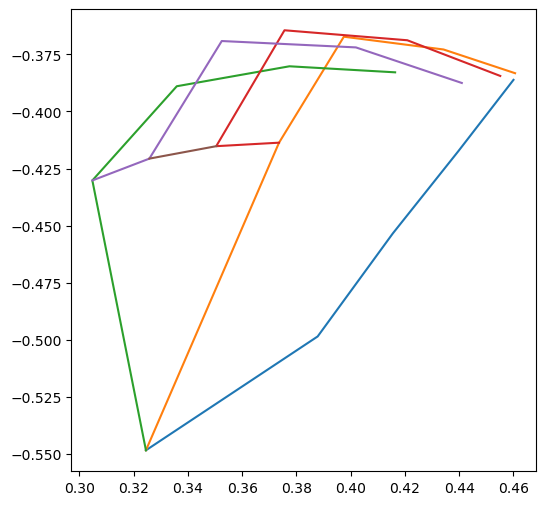

In [18]:
plot_hand(sgl_in_rh, False)

### Left Hand Instance

> no data

In [19]:
sgl_in_lh = sgl_in[sgl_in['type'] == 'left_hand']

In [20]:
sgl_in_lh

,frame,row_id,type,landmark_index,x,y,z
1011,21,21-left_hand-0,left_hand,0,NaN,NaN,NaN
1012,21,21-left_hand-1,left_hand,1,NaN,NaN,NaN
1013,21,21-left_hand-2,left_hand,2,NaN,NaN,NaN
1014,21,21-left_hand-3,left_hand,3,NaN,NaN,NaN
1015,21,21-left_hand-4,left_hand,4,NaN,NaN,NaN
1016,21,21-left_hand-5,left_hand,5,NaN,NaN,NaN
1017,21,21-left_hand-6,left_hand,6,NaN,NaN,NaN
1018,21,21-left_hand-7,left_hand,7,NaN,NaN,NaN
1019,21,21-left_hand-8,left_hand,8,NaN,NaN,NaN
1020,21,21-left_hand-9,left_hand,9,NaN,NaN,NaN


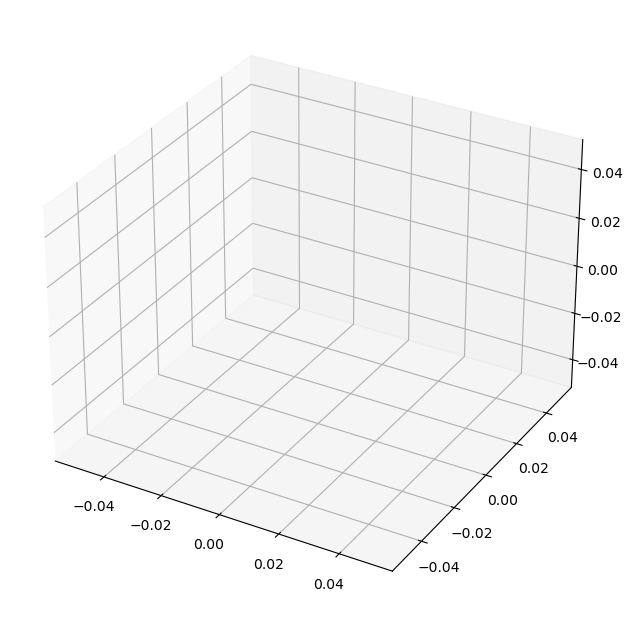

In [21]:
plot_hand(sgl_in_lh, True)

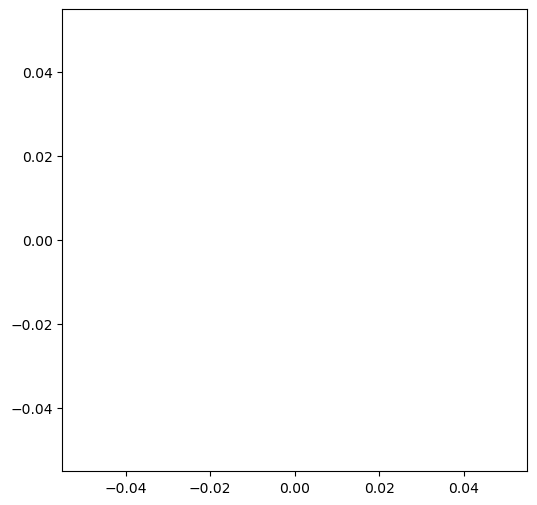

In [22]:
plot_hand(sgl_in_lh, False)

### The Pose

In [23]:
sgl_in_p = sgl_in[sgl_in['type'] == 'pose']

In [24]:
sgl_in_p

,frame,row_id,type,landmark_index,x,y,z
1032,21,21-pose-0,pose,0,0.522175,0.327015,-0.851489
1033,21,21-pose-1,pose,1,0.565269,0.280448,-0.778708
1034,21,21-pose-2,pose,2,0.589815,0.281365,-0.779076
1035,21,21-pose-3,pose,3,0.611988,0.283100,-0.779156
1036,21,21-pose-4,pose,4,0.492643,0.283062,-0.758925
1037,21,21-pose-5,pose,5,0.473426,0.284674,-0.758399
1038,21,21-pose-6,pose,6,0.454361,0.286732,-0.758833
1039,21,21-pose-7,pose,7,0.646040,0.308192,-0.334320
1040,21,21-pose-8,pose,8,0.439378,0.306222,-0.202693
1041,21,21-pose-9,pose,9,0.572650,0.372704,-0.692659


In [25]:
def plot_pose(pose, td):
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)

    if td:
        ax = Axes3D(fig, auto_add_to_figure=False)
        fig.add_axes(ax)

    ind = [[0, [1, 4]], [3, [7, 8]], [0, [4, 7]], [6, [8, 9]], [9, [10, 11]], [11, [12, 13]], [12, [14, 15]], [14, [16, 17]], 
           [16, [22, 23]], [16, [18, 19]], [16, [20, 21]], [18, [20, 21]], [11, [13, 14]], [13, [15, 16]], [15, [21, 22]], [15, [19, 20]],
           [15, [17, 18]], [17, [19, 20]], [12, [24, 25]], [24, [26, 27]], [26, [28, 29]], [28, [30, 31]], [30, [32, 33]], [28, [32, 33]], 
           [11, [23, 24]], [23, [25, 26]], [25, [27, 28]], [27, [29, 30]], [29, [31, 32]], [27, [31, 32]], [23, [24, 25]]]

    for i, k in ind: 
        x, y, z = add_init_c(i, k, pose)
        if td:
            ax.plot(x, -1*y, z)
        else:
            ax.plot(x, -1*y)

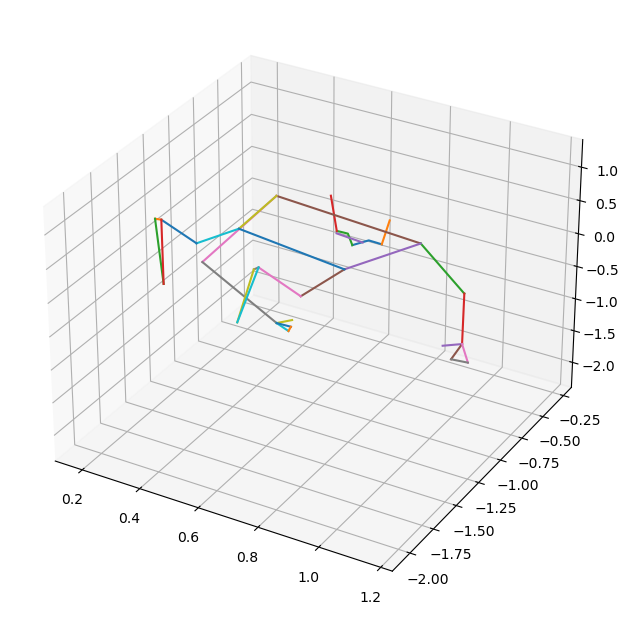

In [26]:
plot_pose(sgl_in_p, True)

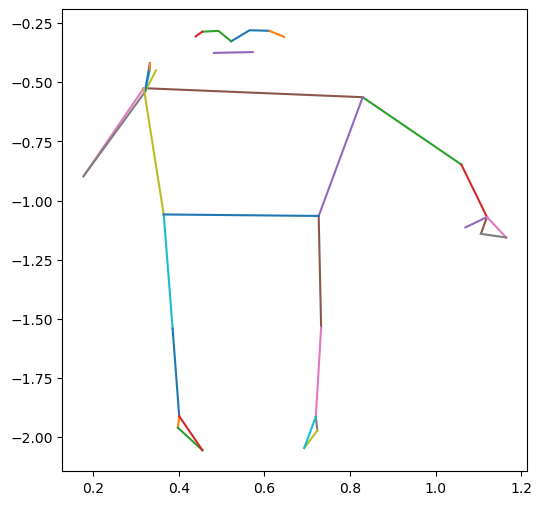

In [27]:
plot_pose(sgl_in_p, False)

### The Face

In [28]:
sgl_in_f = sgl_in[sgl_in['type'] == 'face']

In [29]:
sgl_in_f

,frame,row_id,type,landmark_index,x,y,z
543,21,21-face-0,face,0,0.501150,0.380554,-0.031570
544,21,21-face-1,face,1,0.492906,0.349360,-0.058176
545,21,21-face-2,face,2,0.498327,0.358128,-0.031189
546,21,21-face-3,face,3,0.487708,0.320568,-0.040426
547,21,21-face-4,face,4,0.492322,0.340403,-0.061569
...,...,...,...,...,...,...,...
1006,21,21-face-463,face,463,0.536807,0.298735,0.000994
1007,21,21-face-464,face,464,0.529238,0.300919,-0.003959
1008,21,21-face-465,face,465,0.524165,0.302481,-0.011143
1009,21,21-face-466,face,466,0.592553,0.293117,-0.003791


This one we won't turn into vectors like the others. Due to its mapping it wouldn't make sense.

In [30]:
def plot_face(face, td):
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)

    if td:
        ax = Axes3D(fig, auto_add_to_figure=False)
        fig.add_axes(ax)

    if td:
        ax.scatter(face['x'], -1*face['y'], face['z'])
    else:
        ax.scatter(face['x'], -1*face['y'])

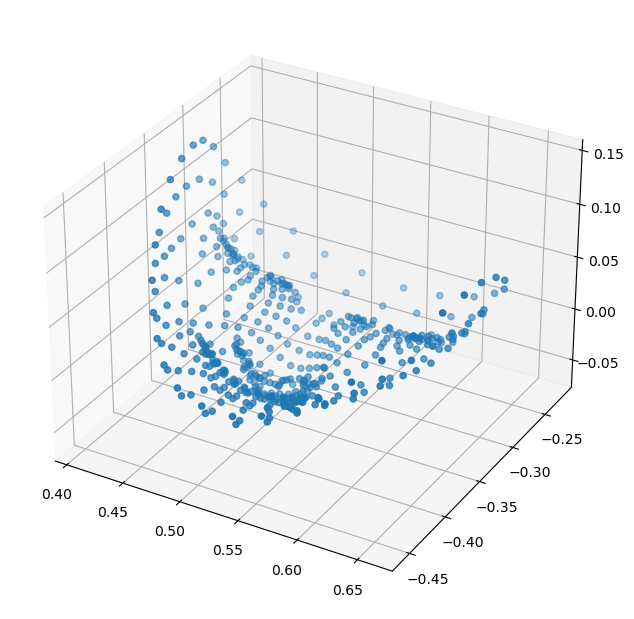

In [31]:
plot_face(sgl_in_f, True)

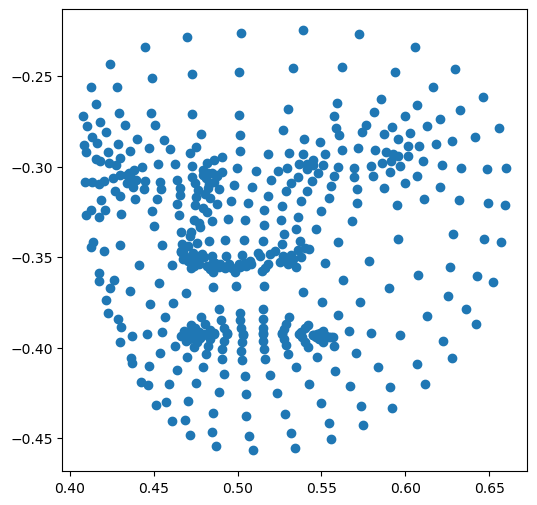

In [32]:
plot_face(sgl_in_f, False)

In [33]:
def plot_mix(pose, face, rhand, lhand, td):
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)

    ind = [[11, [12, 13]], [12, [14, 15]], [14, [16, 17]], [11, [13, 14]], [13, [15, 16]], [12, [24, 25]], 
           [24, [26, 27]], [26, [28, 29]], [28, [30, 31]], [30, [32, 33]], [28, [32, 33]], [11, [23, 24]], [23, [25, 26]], [25, [27, 28]], 
           [27, [29, 30]], [29, [31, 32]], [27, [31, 32]], [23, [24, 25]]]

    if td:
        ax = Axes3D(fig, auto_add_to_figure=False)
        fig.add_axes(ax)

    for i, k in ind: 
        x, y, z = add_init_c(i, k, pose)
        if td:
            ax.plot(x, -1*y, z)
        else:
            ax.plot(x, -1*y)
            
    s = [1] * face['x'].shape[0]
    if td:
        ax.scatter(face['x'], -1*face['y'], face['z'], s=s)
    else:
        ax.scatter(face['x'], -1*face['y'], s=s)
        
    ind = [[0, [0, 5]], [0, [5, 9]], [0, [17, 21]], [5, [9, 13]], [17, [13, 17]], [9, [13, 14]]]
    
    for i, k in ind: 
        x, y, z = add_init_c(i, k, rhand)
        if td:
            ax.plot(x, -1*y, z)
        else:
            ax.plot(x, -1*y)
    
    for i, k in ind: 
        x, y, z = add_init_c(i, k, lhand)
        if td:
            ax.plot(x, -1*y, z)
        else:
            ax.plot(x, -1*y)

The face and pose are calibrated for the z dimension but the hands aren't. They can likely be used to determine what the hand looks like in the z but not all together with the body.

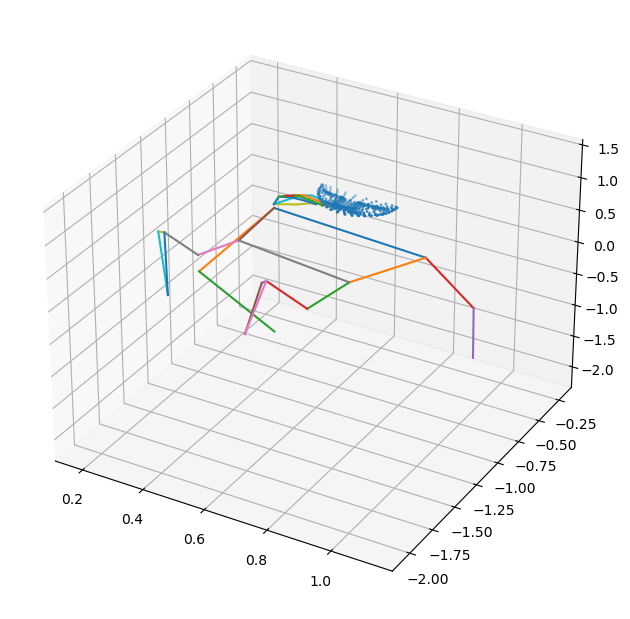

In [34]:
plot_mix(sgl_in_p, sgl_in_f, sgl_in_rh, sgl_in_lh, True)

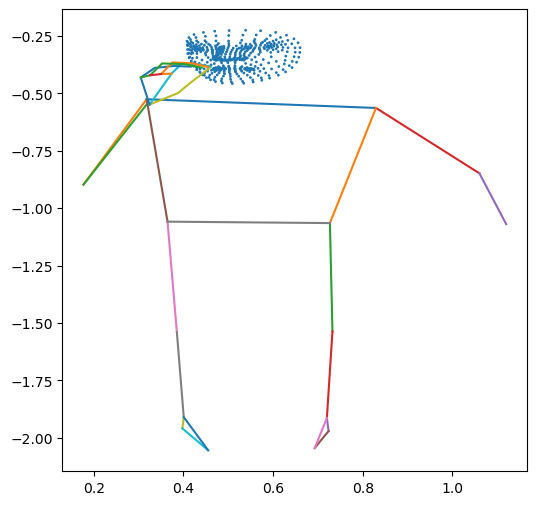

In [35]:
plot_mix(sgl_in_p, sgl_in_f, sgl_in_rh, sgl_in_lh, False)

# Multi Frame - Single Instace 2D/3D Visualization

In [36]:
face_an = example_landmark[example_landmark['type'] == 'face']

In [37]:
fig = px.scatter_3d(face_an, x="x", y="y", z="z", animation_frame="frame", hover_name="row_id", width=800, height=800)
fig.update_traces(marker_size=3)

fig.update_layout(
    scene = dict(
        xaxis = dict(visible=False),
        yaxis = dict(visible=False),
        zaxis =dict(visible=False)
        )
    )

camera_params = dict(
    up=dict(x=0,y=0,z=0),
    center=dict(x=0,y=0,z=0),
    eye=dict(x=0,y=0,z=-2)
)

fig.update_layout(scene_camera=camera_params)

In [38]:
face_an['y'] = face_an['y'] * -1

fig = px.scatter(face_an, x="x", y="y", animation_frame="frame", hover_name="row_id", width=800, height=800)
fig.update_traces(marker_size=3)

fig.update_layout(
    scene = dict(
        xaxis = dict(visible=False),
        yaxis = dict(visible=False),
        )
    )

fig.update_xaxes(
    range=(face_an['x'].min(), face_an['x'].max()),
    constrain='domain'
)

fig.update_yaxes(
    range=(face_an['y'].min(), face_an['y'].max()),
    constrain='domain'
)

camera_params = dict(
    up=dict(x=0,y=0),
    center=dict(x=0,y=0),
    eye=dict(x=0,y=0)
)

fig.update_layout(scene_camera=camera_params)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
pose_place_ind = [0, 1, 1, 1, 2, 2, 2, 1, 2, 3, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9] * 23

In [40]:
pose_an = example_landmark[example_landmark['type'] == 'pose']
pose_an['pose_place'] = pose_place_ind

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
fig = px.line_3d(pose_an, x="x", y="y", z="z", animation_frame="frame", hover_name="row_id", color="pose_place", width=800, height=800)
fig.update_traces(marker_size=3)

fig.update_layout(
    scene = dict(
        xaxis = dict(visible=False),
        yaxis = dict(visible=False),
        zaxis =dict(visible=False)
        )
    )

camera_params = dict(
    up=dict(x=0,y=0,z=0),
    center=dict(x=0,y=0,z=0),
    eye=dict(x=0,y=0,z=-2)
)

fig.update_layout(scene_camera=camera_params)

In [42]:
pose_an['y'] = pose_an['y'] * -1

fig = px.line(pose_an, x="x", y="y", animation_frame="frame", hover_name="row_id", color="pose_place", width=800, height=800)
fig.update_traces(marker_size=3)

fig.update_layout(
    scene = dict(
        xaxis = dict(visible=False),
        yaxis = dict(visible=False),
        )
    )

fig.update_xaxes(
    range=(pose_an['x'].min(), pose_an['x'].max()),
    constrain='domain'
)

fig.update_yaxes(
    range=(pose_an['y'].min(), pose_an['y'].max()),
    constrain='domain'
)

camera_params = dict(
    up=dict(x=0,y=0),
    center=dict(x=0,y=0),
    eye=dict(x=0,y=0)
)

fig.update_layout(scene_camera=camera_params)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
hand_place = []

def create_hand(row):
    lnd = row['landmark_index']
    if lnd < 5:
        hand_place.append(1)
    elif 5 <= lnd < 9:
        hand_place.append(2)
    elif 9 <= lnd < 13:
        hand_place.append(3)
    elif 13 <= lnd < 17:
        hand_place.append(4)
    else:
        hand_place.append(5)

In [44]:
rh_an = example_landmark[example_landmark['type'] == 'right_hand']
rh_an.apply(create_hand, axis=1)
rh_an['hand_place'] = hand_place

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
fig = px.line_3d(rh_an, x="x", y="y", z='z', animation_frame="frame", hover_name="row_id", color="hand_place", width=800, height=800)
fig.update_traces(marker_size=3)

fig.update_layout(
    scene = dict(
        xaxis = dict(visible=False),
        yaxis = dict(visible=False),
        zaxis =dict(visible=False)
        )
    )

camera_params = dict(
    up=dict(x=0,y=0,z=0),
    center=dict(x=0,y=0,z=0),
    eye=dict(x=0,y=0,z=-2)
)

fig.update_layout(scene_camera=camera_params)

In [46]:
rh_an['y'] = rh_an['y'] * -1

fig = px.line(rh_an, x="x", y="y", animation_frame="frame", hover_name="row_id", color="hand_place", width=800, height=800)
fig.update_traces(marker_size=3)

fig.update_layout(
    scene = dict(
        xaxis = dict(visible=False),
        yaxis = dict(visible=False),
        )
    )

fig.update_xaxes(
    range=(rh_an['x'].min(), rh_an['x'].max()),
    constrain='domain'
)

fig.update_yaxes(
    range=(rh_an['y'].min(), rh_an['y'].max()),
    constrain='domain'
)

camera_params = dict(
    up=dict(x=0,y=0),
    center=dict(x=0,y=0),
    eye=dict(x=0,y=0)
)

fig.update_layout(scene_camera=camera_params)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



> #### It becomes visable that frames are lost through the course of the frames.

# Distribution EDA

In [47]:
dftr

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie
...,...,...,...,...
94472,train_landmark_files/53618/999786174.parquet,53618,999786174,white
94473,train_landmark_files/26734/999799849.parquet,26734,999799849,have
94474,train_landmark_files/25571/999833418.parquet,25571,999833418,flower
94475,train_landmark_files/29302/999895257.parquet,29302,999895257,room


In [48]:
dftr['sign'].value_counts()

listen    415
look      414
shhh      411
donkey    410
mouse     408
         ... 
dance     312
person    312
beside    310
vacuum    307
zipper    299
Name: sign, Length: 250, dtype: int64

In [49]:
dftr['sign'].describe()

count      94477
unique       250
top       listen
freq         415
Name: sign, dtype: object

In [50]:
dftr['sign'].value_counts().describe()

count    250.000000
mean     377.908000
std       19.395367
min      299.000000
25%      369.000000
50%      381.500000
75%      391.000000
max      415.000000
Name: sign, dtype: float64

In [51]:
min_frames = []
max_frames = []
len_frames = []
missing_frames_face = {}
missing_frames_pose = {}
missing_frames_rh = {}
missing_frames_lh = {}

In [52]:
def access_missing_dict(missing, part, i, minn, t):
    try:
        missing[i - minn].append(t[t['type'] == part]['x'].isnull().sum())
    except:
        missing[i - minn] = [t[t['type'] == part]['x'].isnull().sum()]

In [53]:
def get_parq_data(row):
    lnd = pd.read_parquet('/kaggle/input/asl-signs/' + row['path'])
    fs = lnd['frame']
    minn = fs.min()
    maxx = fs.max()
    min_frames.append(minn)
    max_frames.append(maxx)
    len_frames.append(maxx - minn)

In [54]:
def get_parq_missing_data(row):
    lnd = pd.read_parquet('/kaggle/input/asl-signs/' + row['path'])
    fs = lnd['frame']
    minn = fs.min()
    maxx = fs.max()
    
    for i in range(minn, maxx+1):
        t = lnd[lnd['frame'] == i]
        access_missing_dict(missing_frames_face, 'face', i, minn, t)
        access_missing_dict(missing_frames_pose, 'pose', i, minn, t)
        access_missing_dict(missing_frames_rh, 'right_hand', i, minn, t)
        access_missing_dict(missing_frames_lh, 'left_hand', i, minn, t)

In [55]:
def run_parq_d():
    print("Getting Frame Data")
    
    dftr.apply(get_parq_data, axis=1)
    
    pd.DataFrame(min_frames).to_csv("/kaggle/working/min_frames.csv")
    pd.DataFrame(max_frames).to_csv("/kaggle/working/max_frames.csv")
    pd.DataFrame(len_frames).to_csv("/kaggle/working/len_frames.csv")

#run_parq_d()

In [56]:
def even_dicts(missing_frames):
    maxx = 0
    for i in missing_frames:
        if len(missing_frames[i]) > maxx:
            maxx = len(missing_frames[i])
    for k, i in missing_frames.items():
        if len(i) < maxx:
            missing_frames[k] = i + [float('nan') for x in range(len(i), maxx)]

In [57]:
def run_parq_missing_d():
    print("Getting Missing Frame Data")
    dftr.apply(get_parq_missing_data, axis=1)
    
    even_dicts(missing_frames_face)
    even_dicts(missing_frames_pose)
    even_dicts(missing_frames_rh)
    even_dicts(missing_frames_lh)
    
    pd.DataFrame(missing_frames_face).to_csv("/kaggle/working/missing_frames_face.csv")
    pd.DataFrame(missing_frames_pose).to_csv("/kaggle/working/missing_frames_pose.csv")
    pd.DataFrame(missing_frames_rh).to_csv("/kaggle/working/missing_frames_rh.csv")
    pd.DataFrame(missing_frames_lh).to_csv("/kaggle/working/missing_frames_lh.csv")
    
#run_parq_missing_d()

In [58]:
lenf = pd.read_csv('/kaggle/input/gasl-frame-data/len_frames.csv', index_col=0, names=['frames']).iloc[1:, :]
maxf = pd.read_csv('/kaggle/input/gasl-frame-data/max_frames.csv', index_col=0, names=['frames']).iloc[1:, :]
minf = pd.read_csv('/kaggle/input/gasl-frame-data/min_frames.csv', index_col=0, names=['frames']).iloc[1:, :]
mff = pd.read_csv('/kaggle/input/gasl-frame-data/missing_frames_face.csv', index_col=0)
mfp = pd.read_csv('/kaggle/input/gasl-frame-data/missing_frames_pose.csv', index_col=0)
mfrh = pd.read_csv('/kaggle/input/gasl-frame-data/missing_frames_rh.csv', index_col=0)
mflh = pd.read_csv('/kaggle/input/gasl-frame-data/missing_frames_lh.csv', index_col=0)

In [59]:
lenf.describe()

,frames
count,94477.000000
mean,36.940335
std,44.182579
min,1.000000
25%,11.000000
50%,21.000000
75%,43.000000
max,536.000000


In [60]:
(lenf > 400).sum()

frames    13
dtype: int64

In [61]:
minf.describe()

,frames
count,94477.000000
mean,30.421044
std,29.630199
min,0.000000
25%,16.000000
50%,21.000000
75%,29.000000
max,484.000000


In [62]:
maxf.describe()

,frames
count,94477.000000
mean,67.361379
std,58.981009
min,1.000000
25%,33.000000
50%,43.000000
75%,62.000000
max,546.000000


In [63]:
def get_missing_frame_counts(col):
    return col.sum()

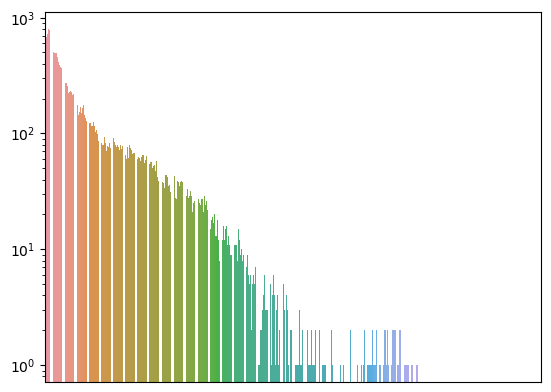

In [64]:
mff_bar = mff.apply(get_missing_frame_counts) / 468 

s = sns.barplot(x=mff_bar.index, y=mff_bar.values)

s.set(xticklabels=[])
s.tick_params(bottom=False)
plt.yscale('log')

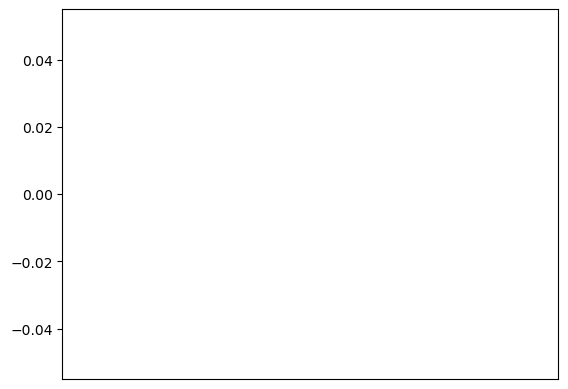

In [65]:
mfp_bar = mfp.apply(get_missing_frame_counts) / 33 

s = sns.barplot(x=mfp_bar.index, y=mfp_bar.values)

s.set(xticklabels=[])
s.tick_params(bottom=False)

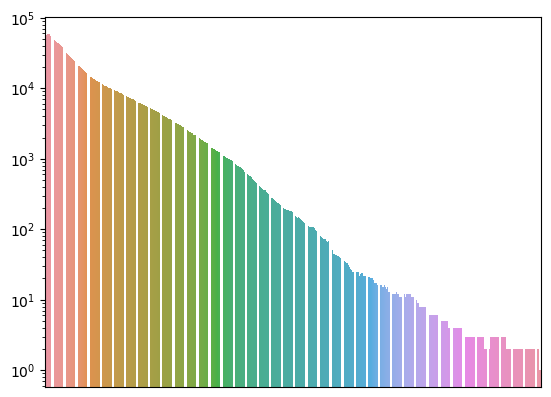

In [66]:
mfrh_bar = mfrh.apply(get_missing_frame_counts) / 21 

s = sns.barplot(x=mfrh_bar.index, y=mfrh_bar.values)

s.set(xticklabels=[])
s.tick_params(bottom=False)
plt.yscale('log')

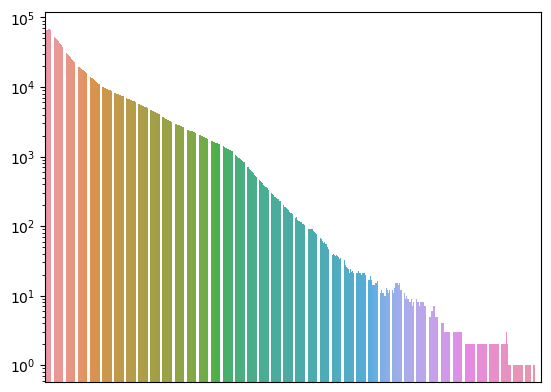

In [67]:
mflh_bar = mflh.apply(get_missing_frame_counts) / 21 

s = sns.barplot(x=mflh_bar.index, y=mflh_bar.values)

s.set(xticklabels=[])
s.tick_params(bottom=False)
plt.yscale('log')

In [68]:
def get_frame_counts(col):
    return col.notnull().sum()

In [69]:
mfp_c_bar = mfp.apply(get_frame_counts)

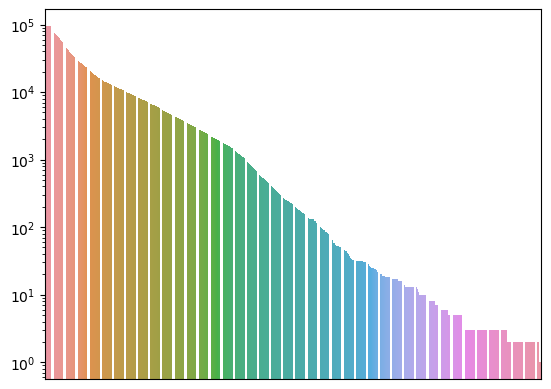

In [70]:
s = sns.barplot(x=mfp_c_bar.index, y=mfp_c_bar.values)

s.set(xticklabels=[])
s.tick_params(bottom=False)
plt.yscale('log')

It looks like the missing hands are roughly proportional to the amount of instances. 

Text(0.5, 1.0, 'Missing Left Hand Frames : Frames')

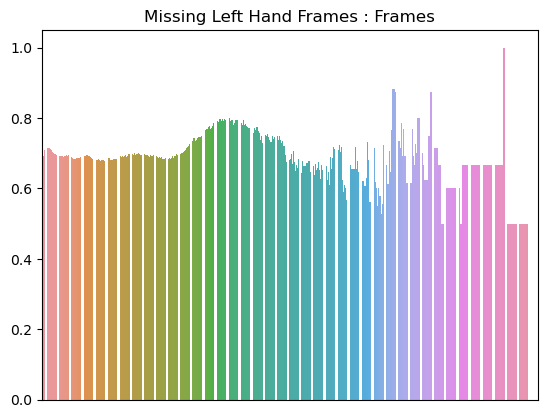

In [71]:
s = sns.barplot(x=mfp_c_bar.index, y=mflh_bar.values/mfp_c_bar.values)

s.set(xticklabels=[])
s.tick_params(bottom=False)
s.set_title('Missing Left Hand Frames : Frames')

Text(0.5, 1.0, 'Missing Right Hand Frames : Frames')

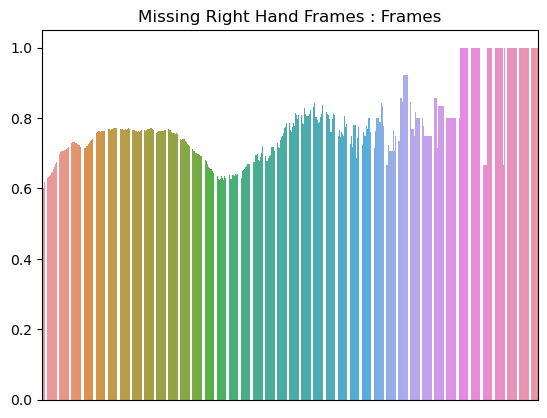

In [72]:
s = sns.barplot(x=mfp_c_bar.index, y=mfrh_bar.values/mfp_c_bar.values)

s.set(xticklabels=[])
s.tick_params(bottom=False)
s.set_title('Missing Right Hand Frames : Frames')

Right Hand tends to be more likely visible early on while the left hand tends to be more visible towards the end.

It almost looks like the beginning parts of the right and left hand frame proportions could fit in one another.

Text(0.5, 1.0, 'Missing Face Frames : Frames')

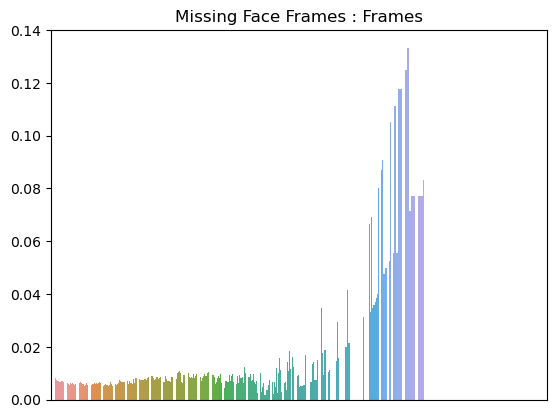

In [73]:
s = sns.barplot(x=mfp_c_bar.index, y=mff_bar.values/mfp_c_bar.values)

s.set(xticklabels=[])
s.tick_params(bottom=False)
s.set_title('Missing Face Frames : Frames')